In [14]:
from network import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
T,N = 100,100
symmetric=True

network = Network(N=N, dirichlet=1)

A0 = network.generate_A0(T=T, avg_degree=100, symmetric=symmetric)
if symmetric: 
    for t in range(T): 
        assert(np.all(A0[t] == A0[t].T))
    
A1 = network.apply_exposure(A0, K_exp=3)

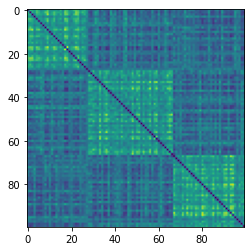

In [38]:
plt.imshow(A0.sum(axis=0))

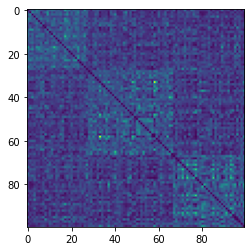

In [41]:
plt.imshow(A1.sum(axis=0))

In [42]:
mu, Z, u, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_w()

In [43]:
print("average degree A0: ", A0.sum()/T/N, "average degree A1: ", A1.sum()/T/N)

average degree A0:  99.76299999999999 average degree A1:  33.1242


### The probability of exposure is $\frac{1}{K_{exp}}$

# Testing Exposure Inference

In [27]:
symmetric=False
import warnings
warnings.filterwarnings("ignore")

In [28]:
seeds = [697752728, 4190089612, 1176914559, 3077924848, 315917623, 2544020234, 1077758578, 4071300106, 534591752, 3553386411]

In [44]:
for seed in seeds: 
    losses_exp, theta_exp = fit(A1, 3,3, seed=seed, symmetric=symmetric, iter1=200)
    mu_exp,Q_exp,u_exp,_,w_exp = theta_exp
    print("Accuracy predicting mu: ", evaluate_memberships(mu, mu_exp, mu, mu_exp)[0])
    print("Accuracy predicting u: ", evaluate_memberships(u, u_exp, mu, mu_exp)[0])
    print("Accuracy predicting Z: ", calculate_AUC(Z, Q_exp))

running Exp inference for 3000 iterations: 

Exposure inference with T=100, N=100, K=3 and 2800 iterations took 186.15835739700015 seconds

Accuracy predicting mu:  0.709922335996302
Accuracy predicting u:  0.8318145648231969
Accuracy predicting Z:  0.8252975683588346
running Exp inference for 3000 iterations: 

Exposure inference with T=100, N=100, K=3 and 2534 iterations took 123.94150475800052 seconds

Accuracy predicting mu:  0.7204220498147006
Accuracy predicting u:  0.804779317942739
Accuracy predicting Z:  0.8257321533630263
running Exp inference for 3000 iterations: 

Exposure inference with T=100, N=100, K=3 and 2582 iterations took 140.50498043799962 seconds

Accuracy predicting mu:  0.7235061318287864
Accuracy predicting u:  0.8137482808043066
Accuracy predicting Z:  0.8224920431152751
running Exp inference for 3000 iterations: 

Exposure inference with T=100, N=100, K=3 and 2518 iterations took 115.52187394400062 seconds

Accuracy predicting mu:  0.8460201359825031
Accuracy

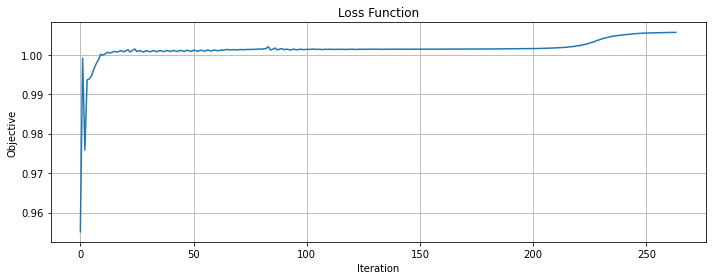

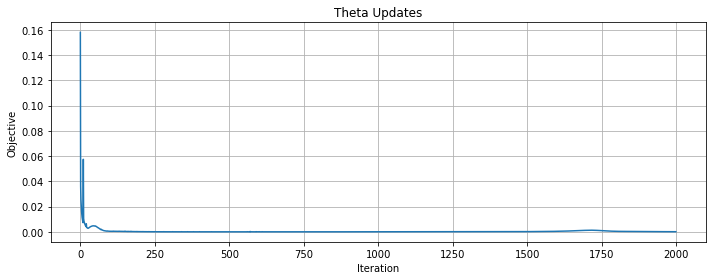

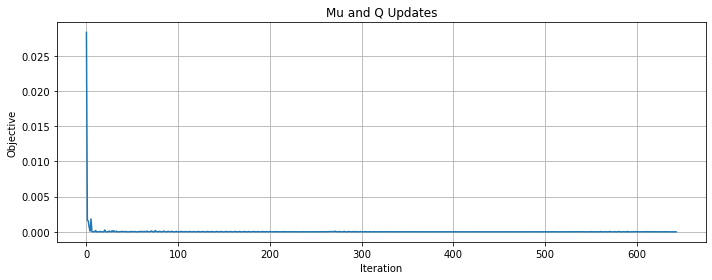

In [31]:
plot_losses(losses_exp[0], title="Loss Function")
plot_losses(losses_exp[1], title="Theta Updates")
plot_losses(losses_exp[2], title="Mu and Q Updates")

## No Exposure Inference

In [34]:
for seed in seeds: 
    losses_noexp, theta_noexp = fit(A1, 3,3, seed=seed, symmetric=symmetric, exp=False)
    u_noexp,v_noexp,w_noexp = theta_noexp
    print("Accuracy predicting u: ", evaluate_memberships(u, u_noexp, u, u_noexp)[0])

running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=100, N=50, K=3 and 3220 iterations took 4.694231773000865 seconds

Accuracy predicting u:  0.845654109489991
running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=100, N=50, K=3 and 4520 iterations took 6.804197531000682 seconds

Accuracy predicting u:  0.687984052853606
running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=100, N=50, K=3 and 3770 iterations took 5.588663910999458 seconds

Accuracy predicting u:  0.858886349713973
running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=100, N=50, K=3 and 3620 iterations took 5.682898076998754 seconds

Accuracy predicting u:  0.8518729290517286
running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=100, N=50, K=3 and

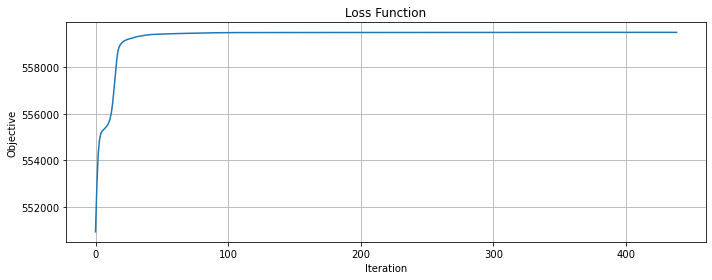

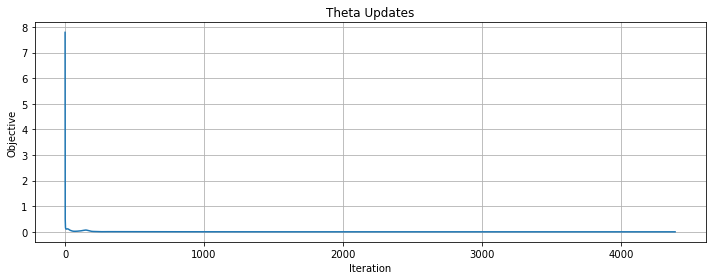

In [35]:
plot_losses(losses_noexp[0], title="Loss Function")
plot_losses(losses_noexp[1], title="Theta Updates")

# Open Questions
- why is the loss function decreasing sometimes?
    - loss function decreases when only updating mu and Q
    - potentially numerical update problems, then nothing needs to be done
    - otherwise it could be an error in the loss computation or in the updates
- how to setup experiments? 
    - difficulty can be controlled by varying $T=\{1,5,10,50,100\}$
    - influence of exposure can be controlled by varying $K_{exp}= \{3,5,7\}$ as $p_{exp}=\frac{1}{K_{exp}}$
    - $N=100$ (not too big, close to sociopatterns datasets)
    - $avg\ degree\ A^0=100$
    - $K_{aff}=3$
    - 5 random seeds for inference
    - 5 random seeds for network generation
- theory and code always for symmetric adjacency matrices?
    - I would propose so, as it makes everything easier, we can then say it can easily be generalized for not symmetric cases
    - I would fix correlation between u and v to be always 1, not use any hard membership vectors and fix the probability ratio to 0.1

# Symmetric vs Assymmetric Inference
- in the symmetric version, results are much worse than for the asymmetric inference
    - when setting w to be lower triangular they recover and become really good again

# ToDo
- theory for symmetric adjacency matrix

In [11]:
x = np.arange(1,10)

In [12]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
y = x.copy()

In [14]:
y

array([1, 2, 3, 4, 5, 6, 7, 8, 9])